In [136]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('ticks')
pal = sns.color_palette("Set1")
red_color = pal[0]
green_color = pal[2]

In [46]:
import FlowCytometryTools # http://gorelab.bitbucket.org/flowcytometrytools/

In [47]:
well = '48'
datafile=r"D:/Google Drive/ex silico/flow/competition/2015-05-19/MB2015-05-19_F_ROW_TS.0%s.fcs" % well
print datafile
sample = FlowCytometryTools.FCMeasurement(ID="ROW_D_TS", datafile=datafile)

print sample.meta['$DATE']
print sample.meta['$SYS'], sample.meta['$OP']
print "Cell count", sample.meta['$TOT']

D:/Google Drive/ex silico/flow/competition/2015-05-19/MB2015-05-19_F_ROW_TS.048.fcs
2015-May-19
MACSQuantify,2.5.1345.9863 Maayan Bibi
Cell count 25342


In [114]:
print sample.meta['$DATE']
print sample.meta['$SYS'], sample.meta['$OP']
print "Cell count", sample.meta['$TOT']
print sample.channel_names

2015-May-19
MACSQuantify,2.5.1345.9863 Maayan Bibi
Cell count 25342
('HDR-T', 'FSC-A', 'FSC-H', 'FSC-W', 'SSC-A', 'SSC-H', 'SSC-W', 'VioGreen-A', 'VioGreen-H', 'VioGreen-W', 'dsRed/txRed-A', 'dsRed/txRed-H', 'dsRed/txRed-W')


### Forward and Side Scatter

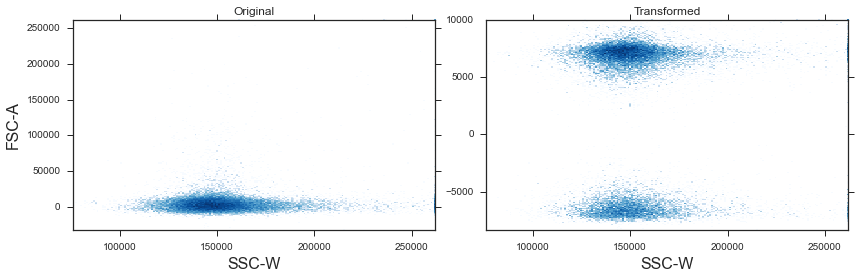

In [105]:
tsample = sample.transform('hlog', b=1,  channels=['FSC-A'])

fig,ax = plt.subplots(1, 2, figsize=(12,4))
sample.plot(['SSC-W', 'FSC-A'], cmap="Blues", ax=ax[0]);
tsample.plot(['SSC-W', 'FSC-A'], cmap="Blues", ax=ax[1])
ax[0].set_title("Original")
ax[1].set_title("Transformed")
ax[1].set_ylabel('')
fig.tight_layout()

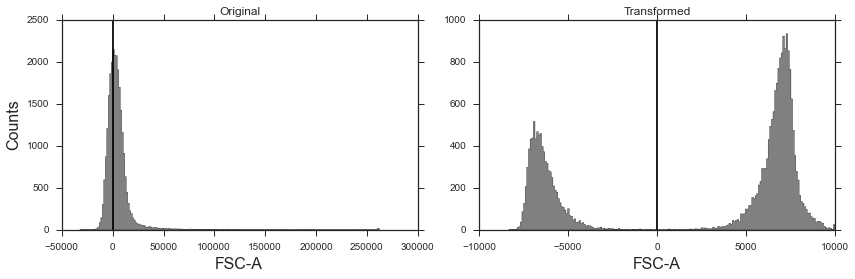

In [110]:
scatter_thgate = FlowCytometryTools.ThresholdGate(0.0, 'FSC-A', region='above')

fig,ax = plt.subplots(1, 2, figsize=(12,4))
sample.plot('FSC-A', gates=scatter_thgate,  ax=ax[0], gate_colors='k');
tsample.plot('FSC-A', gates=scatter_thgate, ax=ax[1], gate_colors='k')
ax[0].set_title("Original")
ax[1].set_title("Transformed")
ax[1].set_ylabel('')
fig.tight_layout()

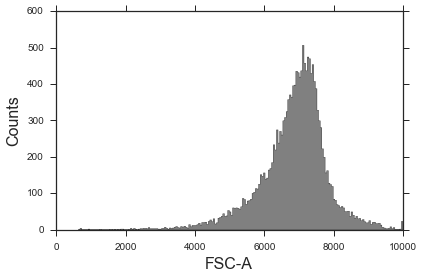

In [112]:
gsample = tsample.gate(scatter_thgate)
gsample.plot('FSC-A', gates=scatter_thgate, gate_colors='k')
plt.tight_layout()

In [113]:
green = 'VioGreen-W'# 'VioGreen-A', 'VioGreen-H',
red =  'dsRed/txRed-A'#, 'dsRed/txRed-H', 'dsRed/txRed-W'

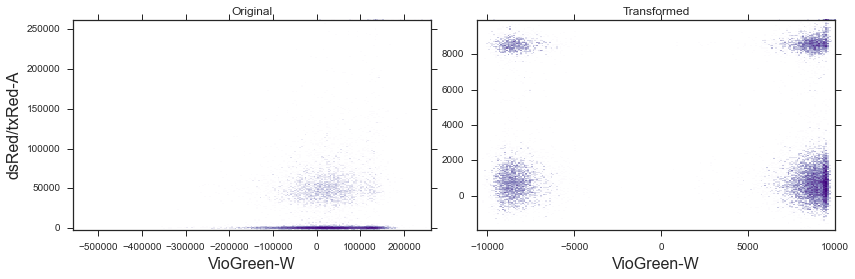

In [117]:
tsample = gsample.transform('hlog', b=1,  channels=[green]).transform('hlog', b=2000,  channels=[red])

fig,ax = plt.subplots(1, 2, figsize=(12,4))
gsample.plot([green, red], cmap="Purples", ax=ax[0]);
tsample.plot([green, red], cmap="Purples", ax=ax[1])
ax[0].set_title("Original")
ax[1].set_title("Transformed")
ax[1].set_ylabel('')
fig.tight_layout()

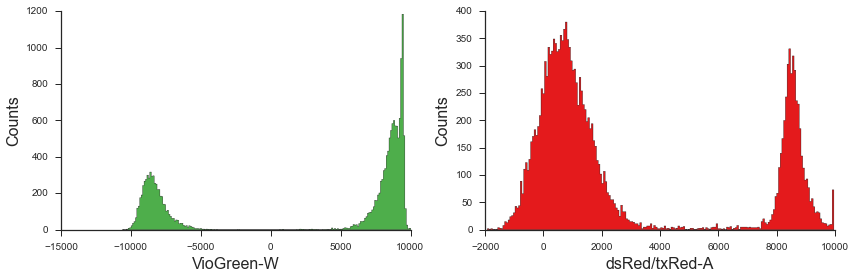

In [118]:
fig,ax = plt.subplots(1, 2, figsize=(12,4))
tsample.plot(green, color=green_color, ax=ax[0]);
tsample.plot(red, color=red_color, ax=ax[1]);
fig.tight_layout()
sns.despine()

In [119]:
green_thgate = FlowCytometryTools.ThresholdGate(1000.0, green, region='above')
red_thgate = FlowCytometryTools.ThresholdGate(5000.0, red, region='above')

green_gate = FlowCytometryTools.core.gates.QuadGate([0, 5000], [green, red], 'bottom right', 'green')
red_gate = FlowCytometryTools.core.gates.QuadGate([0, 5000], [green, red], 'top left', 'red')

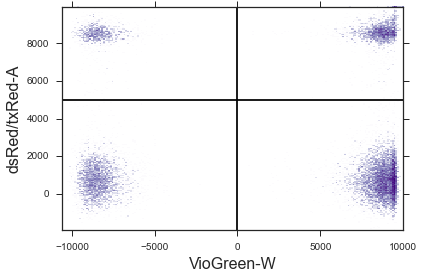

In [120]:
tsample.plot([green, red], gates=[green_gate, red_gate], gate_colors='k', cmap="Purples")
plt.tight_layout()

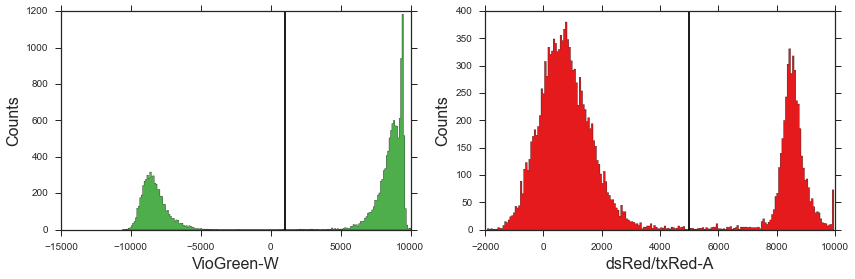

In [121]:
fig,ax = plt.subplots(1, 2, figsize=(12,4))
tsample.plot(green, gates=[green_thgate], color=green_color, gate_colors='k', ax=ax[0])
tsample.plot(red, gates=[red_thgate], color=red_color, gate_colors='k', ax=ax[1])
fig.tight_layout()

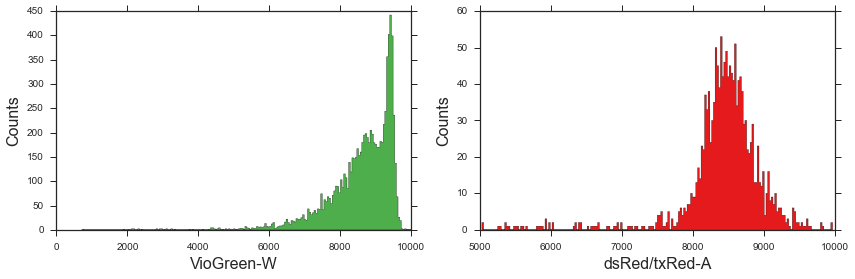

In [122]:
gated_green = tsample.gate(green_gate)
gated_red = tsample.gate(red_gate)

fig,ax = plt.subplots(1, 2, figsize=(12,4))
gated_green.plot(green, color=green_color, ax=ax[0])
gated_red.plot(red, color=red_color, ax=ax[1])
fig.tight_layout()

In [123]:
green_count = gated_green.data.shape[0]
red_count = gated_red.data.shape[0]
total = float(green_count + red_count)
print "Green: %.4f" % (green_count/total)
print "Red:   %.4f" % (red_count/total)

Green: 0.8452
Red:   0.1548


## Plate

In [124]:
datadir = r"D:/Google Drive/ex silico/flow/competition/2015-05-18/"
print datadir
plate = FlowCytometryTools.FCPlate.from_dir(ID='calibration', path=datadir, parser='number_col',
                                            pattern='MB2015-05-18_calibration_C1-10_no8.*.fcs')
plate = plate.dropna()
print plate

D:/Google Drive/ex silico/flow/competition/2015-05-18/
ID:
calibration

Data:
   1  2  3  4  5  6  7  8  9
A  1  2  3  4  5  6  7  8  9


In [125]:
plate = plate.transform('hlog', b=1,  channels=['FSC-A'])
plate = plate.gate(scatter_thgate)
plate = plate.transform('hlog', b=1, channels=[green])
plate = plate.transform('hlog', b=2000,  channels=[red])

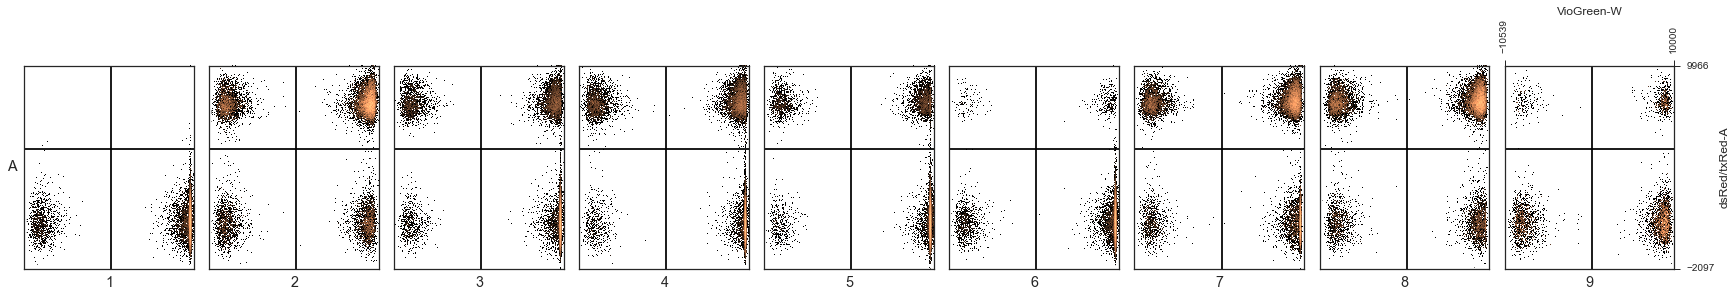

In [135]:
width = 24
height = int(width * 2/12.)

main_ax, ax = plate.plot([green, red], gates=[green_gate, red_gate], gate_colors='k')#, cmap="BuGn")
fig = main_ax.figure
fig.set_size_inches(width, height)
fig.tight_layout()

In [128]:
counts = pd.concat((plate.gate(green_gate).counts(), plate.gate(red_gate).counts()))
counts.index = ['green', 'red']
counts = counts/counts.sum(axis=0)
counts

,1,2,3,4,5,6,7,8,9
green,0.999849,0.442414,0.83469,0.729494,0.906764,0.989337,0.54825,0.403718,0.915416
red,0.000151,0.557586,0.16531,0.270506,0.093236,0.010663,0.45175,0.596282,0.084584
